In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer


In [7]:
# Fonction pour la réduction de dimension (ACP)

def dim_red(mat, p, method='auto'):
    pca = PCA(n_components=p, svd_solver=method)
    reduced_mat = pca.fit_transform(mat)
    return reduced_mat


# Fonction pour le clustering (K-means)
def clust(mat, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(mat)
    return labels

In [8]:
from sklearn.datasets import fetch_20newsgroups
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [5]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [9]:
# perform dimensionality reduction
red_emb = dim_red(embeddings, 20)

In [11]:
# perform clustering
pred = clust(red_emb, k)

In [12]:
# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred, labels)
ari_score = adjusted_rand_score(pred, labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.42 
ARI: 0.25


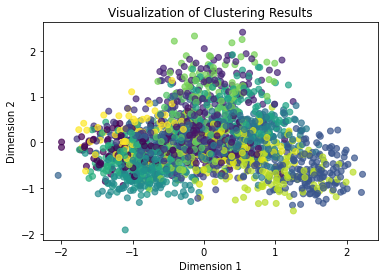

In [14]:
import matplotlib.pyplot as plt

# Perform dimensionality reduction for visualization (2D)
reduced_emb_2d = dim_red(embeddings, 2)

# Plot the clusters
plt.scatter(reduced_emb_2d[:, 0], reduced_emb_2d[:, 1], c=pred, cmap='viridis', alpha=0.7)
plt.title('Visualization of Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
